In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
(X_Train,_),(_,_) = mnist.load_data()  

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_Train.shape)
print(type(X_Train))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [4]:
X_Train = X_Train.reshape((*(X_Train.shape),1))
print(X_Train.shape)

(60000, 28, 28, 1)


In [5]:
#Normalize the Data between -1 and 1

X_Train = (X_Train.astype('float32') - 127.5)/127.5

print(np.min(X_Train))
print(np.max(X_Train))

-1.0
1.0


In [6]:
NUM_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = math.ceil(X_Train.shape[0]/float(BATCH_SIZE))
HALF_BATCH_SIZE = int(BATCH_SIZE/2)

NOISE_DIM = 100

adam = Adam(learning_rate=2e-4,beta_1=0.5)

In [7]:
#Upsampling 
# Start from 7 X 7 X 128
generator = Sequential()
generator.add(Dense(7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

#Double the Activation Size 14 X 14 X 64
generator.add(UpSampling2D())
generator.add(Conv2D(64,kernel_size=(5,5),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# Double the Activation Size 28 X 28 X 1
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))

# Final Output (No ReLu or Batch Norm)
generator.compile(loss='binary_crossentropy', optimizer=adam)
generator.summary()



#Discriminator - Downsampling
discriminator = Sequential()
discriminator.add(Conv2D(64,(5,5),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))

# Prefer Strided Convolutions over MaxPooling
discriminator.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))


discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 64)        204864    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0

In [8]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

def save_imgs(epoch,samples=100):
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()
  

In [9]:
!mkdir images

In [10]:
X_Train.shape

(60000, 28, 28, 1)

Epoch 1 D loss: 100.457518 G loss: 119.236699
Epoch 2 D loss: 166.263471 G loss: 205.400302
Epoch 3 D loss: 159.410302 G loss: 214.979595
Epoch 4 D loss: 162.080891 G loss: 201.795487
Epoch 5 D loss: 162.167122 G loss: 198.825491
Epoch 6 D loss: 161.388796 G loss: 201.034699
Epoch 7 D loss: 161.442473 G loss: 198.589782
Epoch 8 D loss: 160.787238 G loss: 201.492870
Epoch 9 D loss: 161.009295 G loss: 197.689799
Epoch 10 D loss: 160.516208 G loss: 202.074146


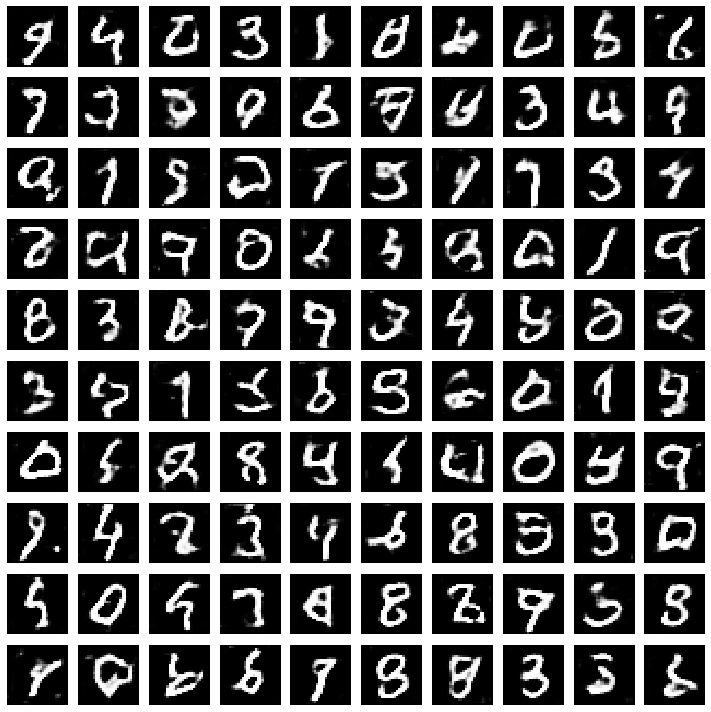

Epoch 11 D loss: 160.646969 G loss: 199.080078
Epoch 12 D loss: 160.595544 G loss: 198.626824
Epoch 13 D loss: 159.449128 G loss: 208.998320
Epoch 14 D loss: 160.162841 G loss: 200.153554
Epoch 15 D loss: 160.036108 G loss: 199.911215
Epoch 16 D loss: 159.514129 G loss: 206.127642
Epoch 17 D loss: 159.600979 G loss: 201.600809
Epoch 18 D loss: 159.681999 G loss: 202.352771
Epoch 19 D loss: 159.638661 G loss: 202.228023
Epoch 20 D loss: 158.649680 G loss: 210.981693


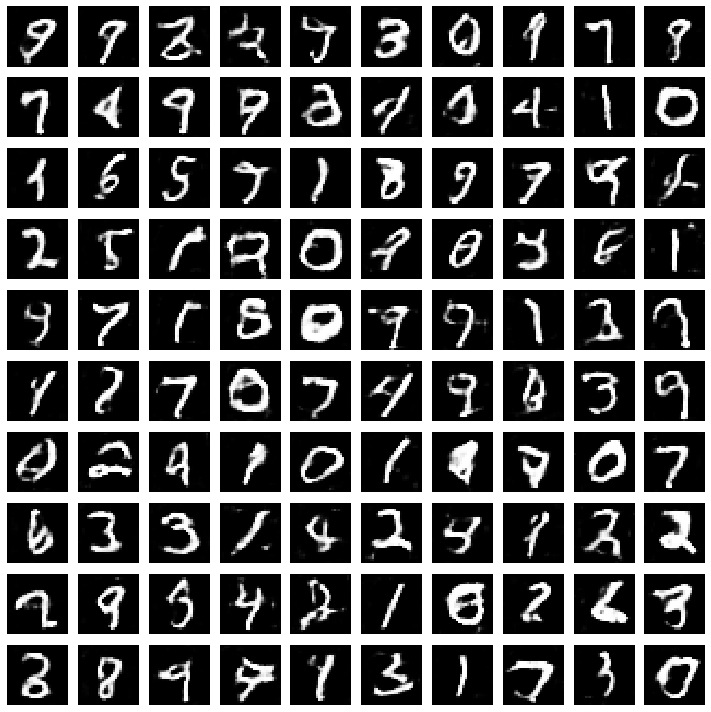

Epoch 21 D loss: 159.233161 G loss: 202.719898
Epoch 22 D loss: 159.065111 G loss: 204.178777
Epoch 23 D loss: 158.898340 G loss: 205.634470
Epoch 24 D loss: 158.736552 G loss: 205.757391
Epoch 25 D loss: 158.426461 G loss: 209.472457
Epoch 26 D loss: 158.515608 G loss: 206.612360
Epoch 27 D loss: 158.148370 G loss: 209.498530
Epoch 28 D loss: 158.281982 G loss: 209.538692
Epoch 29 D loss: 157.613234 G loss: 211.706734
Epoch 30 D loss: 157.787142 G loss: 209.343162


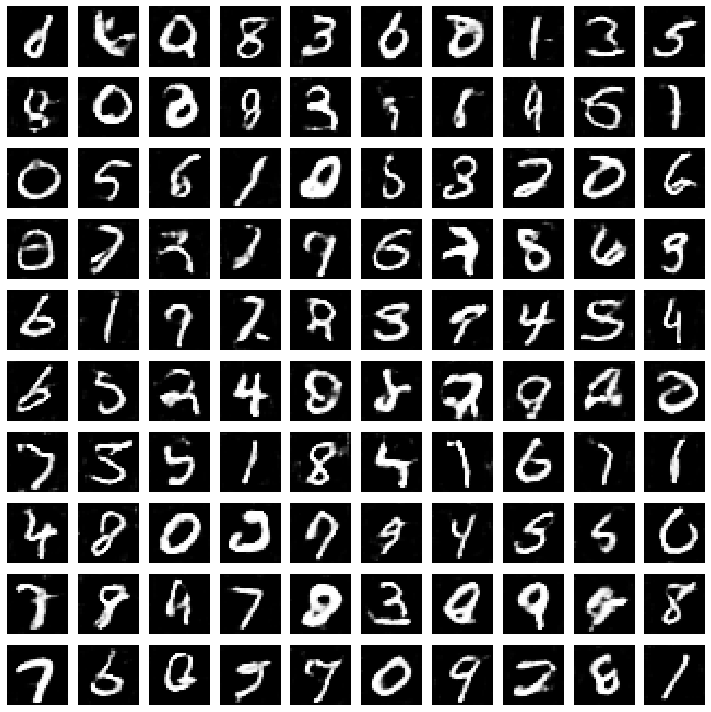

Epoch 31 D loss: 157.814478 G loss: 211.033268
Epoch 32 D loss: 157.555958 G loss: 210.539028
Epoch 33 D loss: 157.322935 G loss: 214.909955
Epoch 34 D loss: 156.772181 G loss: 214.514071
Epoch 35 D loss: 157.007704 G loss: 213.356291
Epoch 36 D loss: 156.810322 G loss: 213.955437
Epoch 37 D loss: 156.600950 G loss: 215.030810
Epoch 38 D loss: 156.411123 G loss: 217.596340
Epoch 39 D loss: 156.072949 G loss: 219.216087
Epoch 40 D loss: 155.873397 G loss: 217.867559


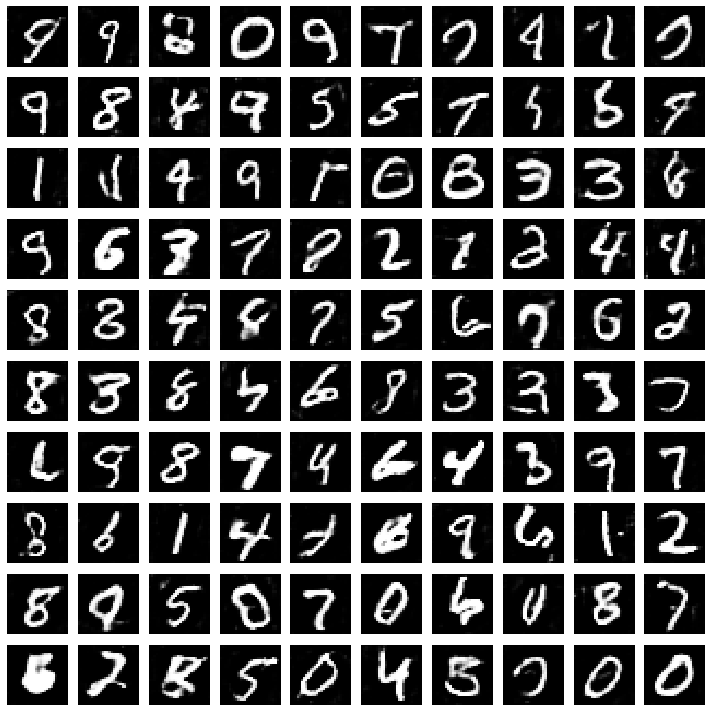

Epoch 41 D loss: 155.848527 G loss: 219.058785
Epoch 42 D loss: 155.467768 G loss: 220.090252
Epoch 43 D loss: 155.249691 G loss: 221.088251
Epoch 44 D loss: 154.918007 G loss: 221.482934
Epoch 45 D loss: 154.558659 G loss: 224.241323
Epoch 46 D loss: 154.768513 G loss: 223.921082
Epoch 47 D loss: 154.357382 G loss: 225.380845
Epoch 48 D loss: 153.957512 G loss: 226.206326
Epoch 49 D loss: 154.016891 G loss: 228.138245
Epoch 50 D loss: 153.720606 G loss: 228.579683


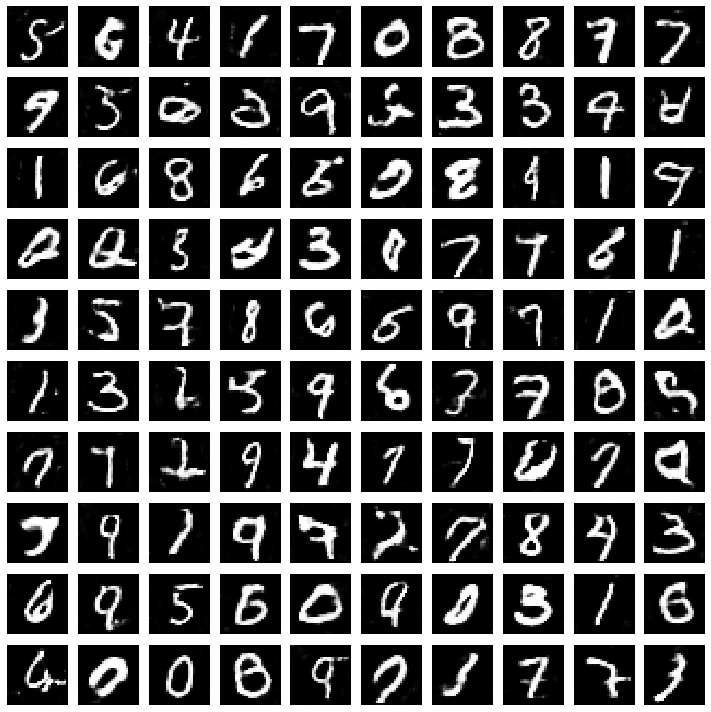

In [11]:
for epoch in range(NUM_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    for step in range(NO_OF_BATCHES):
        #randomly select 50% real images
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH_SIZE)
        real_imgs = X_Train[idx]
        
        # generate 50% random images
        noise = np.random.normal(0,1,size=(HALF_BATCH_SIZE,NOISE_DIM))
        fake_imgs = generator.predict(noise)
        
        
        # one sided label smoothing
        real_y = np.ones((HALF_BATCH_SIZE,1))*0.9 #Label Smoothing, Works well in practice
        fake_y = np.zeros((HALF_BATCH_SIZE,1))
        
        # train on real and fake images
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y) #updates the weights of discriminator
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y) 
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        
        #Train Generator (Complete Model Generator + Frozen Discriminator)
        
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        real_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,real_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d D loss: %f G loss: %f" % ((epoch + 1), epoch_d_loss, epoch_g_loss))

    if (epoch+1)%10==0:
        generator.save('models/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)